In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the datasets**

In [2]:
import pandas as pd

# Load both datasets
trader_df = pd.read_csv('historical_data.csv')  # replace with correct filename
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Preview
print(trader_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [7]:
print(trader_df.columns)
print(sentiment_df.columns)
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()
print(sentiment_df.columns)
sentiment_df.rename(columns={'YourColumnName': 'Date', 'YourOtherColumn': 'Classification'}, inplace=True)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


**CLEANING & PREPROCESSING along with creating MERGED DATA**

In [13]:
import pandas as pd

# ✅ Step 1: Load the CSV files
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# ✅ Step 2: Clean and normalize column names
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

# ✅ Step 3: Convert timestamp formats
# Your trader timestamps are like "18-03-2025 12:50"
trader_df['timestamp ist'] = pd.to_datetime(trader_df['timestamp ist'], format='%d-%m-%Y %H:%M')

# Convert sentiment date column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# ✅ Step 4: Create a common date column in trader_df (without time)
trader_df['date'] = trader_df['timestamp ist'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])  # make it datetime type

# ✅ Step 5: Merge datasets on 'date'
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# ✅ Step 6: Preview the merged data
merged_df.head()


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


Saving Merged_data

In [14]:
merged_df.to_csv('merged_data.csv', index=False)


1.**Load** **Merged** **Data**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged data
df = pd.read_csv('merged_data.csv')

# Optional: strip column names
df.columns = df.columns.str.strip().str.lower()

# Check nulls in classification (some dates might not match)
print(df['classification'].value_counts(dropna=False))


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64


**A. Average Profitability by Sentiment (Fear vs Greed)**

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: closed pnl, dtype: float64


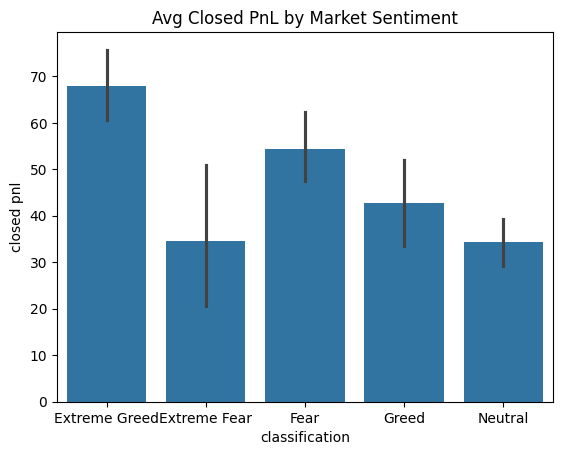

In [17]:
pnl_by_sentiment = df.groupby('classification')['closed pnl'].mean()
print(pnl_by_sentiment)

# Plot
sns.barplot(x='classification', y='closed pnl', data=df)
plt.title('Avg Closed PnL by Market Sentiment')
plt.savefig('/content/profit_by_sentiment.png')
plt.show()


** B. Average Leverage by Sentiment**

classification
Extreme Fear     1.116291
Extreme Greed    0.675902
Fear             1.495172
Greed            1.254372
Neutral          1.044798
Name: fee, dtype: float64


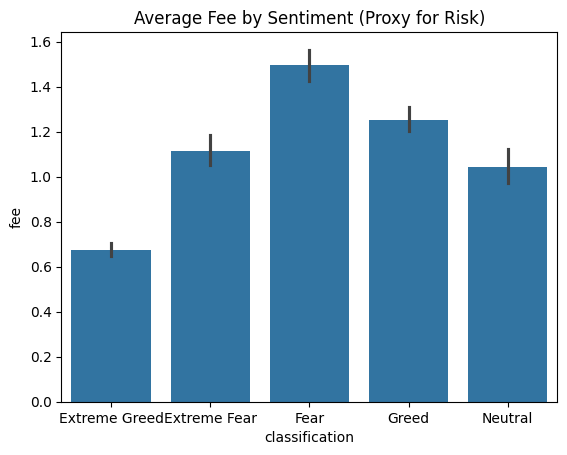

In [18]:
leverage_by_sentiment = df.groupby('classification')['fee'].mean()
print(leverage_by_sentiment)

sns.barplot(x='classification', y='fee', data=df)
plt.title('Average Fee by Sentiment (Proxy for Risk)')
plt.savefig('/content/fee_by_sentiment.png')
plt.show()


**C. Total Trade Volume by Sentiment**

classification
Extreme Fear     1.144843e+08
Extreme Greed    1.244652e+08
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Name: size usd, dtype: float64


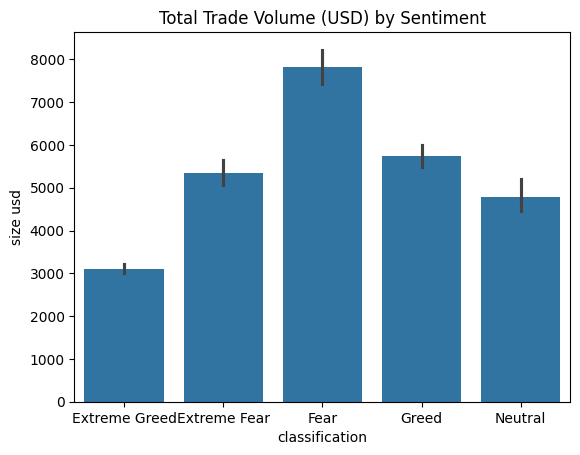

In [19]:
df['size usd'] = pd.to_numeric(df['size usd'], errors='coerce')

volume = df.groupby('classification')['size usd'].sum()
print(volume)

sns.barplot(x='classification', y='size usd', data=df)
plt.title('Total Trade Volume (USD) by Sentiment')
plt.savefig('/content/volume_by_sentiment.png')
plt.show()


In [20]:
from google.colab import files
files.download('profit_by_sentiment.png')
files.download('fee_by_sentiment.png')
files.download('volume_by_sentiment.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>